In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

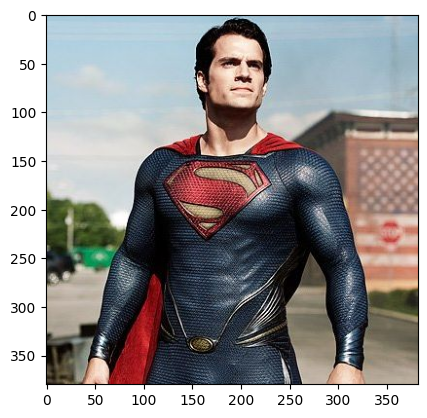

In [3]:
img=read_image("Sample.jpeg")
org_img=np.copy(img)

In [4]:
def edge_mask(img, line_size, blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur,255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,line_size,blur_value)
    return edges

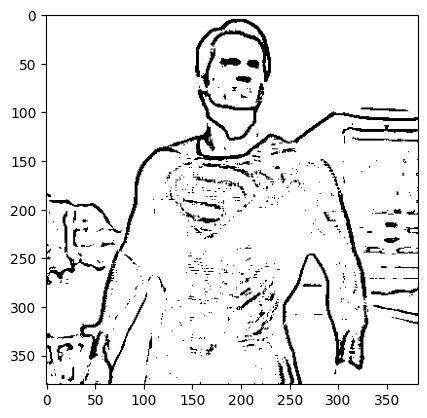

In [5]:
line_size,blur_value=7,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges, cmap = "gray")
plt.show()

In [6]:
def color_quantization(img , k) :
    # Transform the image
    data = np.float32(img).reshape((-1,3))
    # Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    # Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None , criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

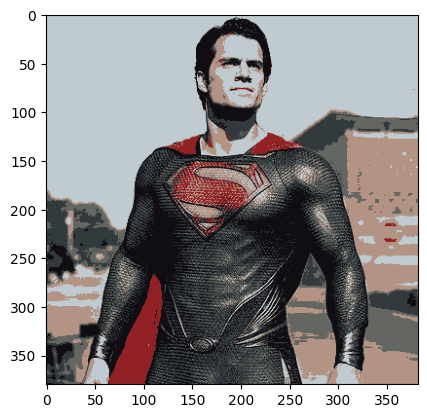

In [7]:
img=color_quantization(img , k=6)
plt.imshow(img)
plt.show()

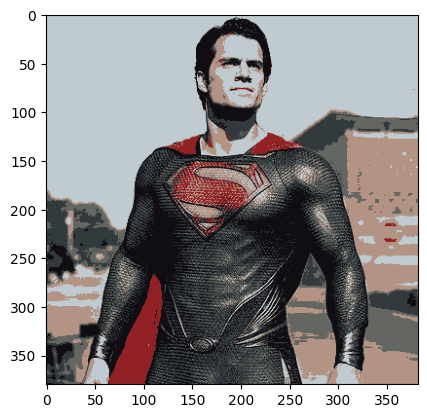

In [8]:
blurred=cv2.bilateralFilter(img, d=7, sigmaColor=200, sigmaSpace=200)
plt.imshow(img)
plt.show()

In [9]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.show()
    
    #plt.imshow(org_img)
    #plt.show()

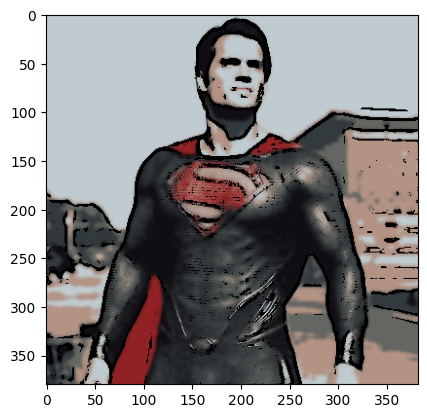

In [10]:
cartoon()